## Zomato Restaurant Project

## Problem Statement

Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

## Content

* Restaurant Id: Unique id of every restaurant across various cities of the world
* Restaurant Name: Name of the restaurant
* Country Code: Country in which restaurant is located
* City: City in which restaurant is located
* Address: Address of the restaurant
* Locality: Location in the city
* Locality Verbose: Detailed description of the locality -_Longitude: Longitude coordinate of the restaurant's location
* Latitude: Latitude coordinate of the restaurant's location
* Cuisines: Cuisines offered by the restaurant
* Average Cost for two: Cost for two people in different currencies 👫
* Currency: Currency of the country
* Has Table booking: yes/no
* Has Online delivery: yes/ no
* Is delivering: yes/ no
* Switch to order menu: yes/no
* Price range: range of price of food
* Aggregate Rating: Average rating out of 5
* Rating color: depending upon the average rating color
* Rating text: text on the basis of rating of rating
*Votes: Number of ratings casted by people

### need to import important libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Lets check the shape info and datatype of datashape.

In [4]:
df.shape

(9551, 21)

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### to check missing values in the data set.

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

## Checking null Values.

<AxesSubplot:>

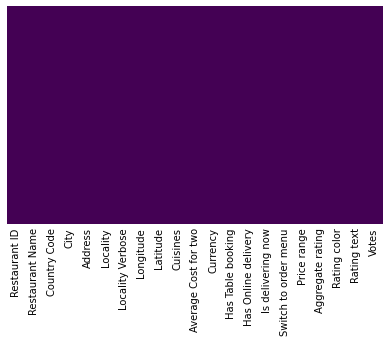

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df_country=pd.read_excel("/Users/nidhinathkatiyar/Downloads/Country-Code (1).xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

COMBINING df_country ALONG WITH df WITH THIS COUNTRYCODE

In [13]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')

In [14]:
final_df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [15]:
## to check data types

final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [16]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [17]:
Country_names=final_df.Country.value_counts().index

In [18]:
country_val=final_df.Country.value_counts().values

In [19]:
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

## Visualisation

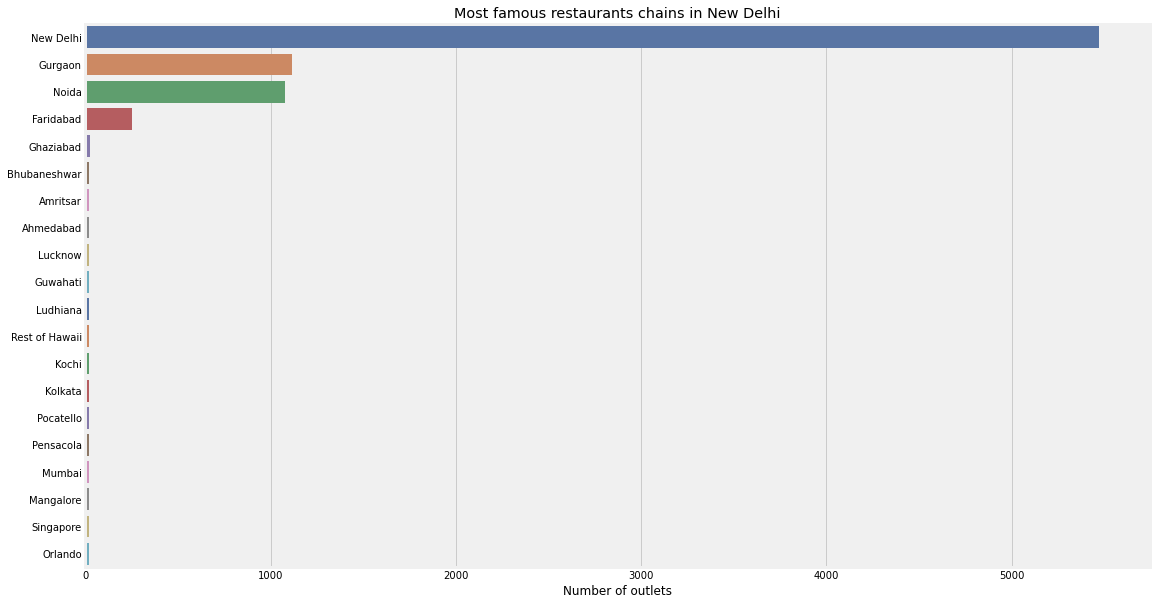

In [20]:
plt.figure(figsize=(17,10))
chains=df['City'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in New Delhi")
plt.xlabel("Number of outlets")
plt.show()

([<matplotlib.patches.Wedge at 0x7f8f920c83a0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.030157837943120734, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.016449729787156763, '0.87%')])

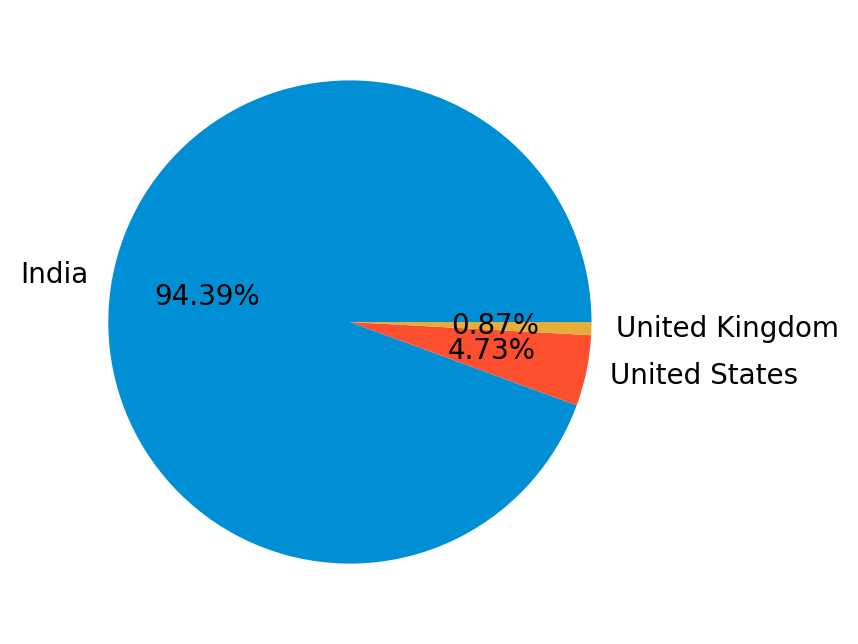

In [21]:
## Pie Chart- Top 3 country 
plt.figure(figsize=(14,4), dpi=200)
plt.pie(country_val[:3],labels=Country_names[:3],autopct='%1.2f%%')

## Observation:
Zomato maximum records are from india and then after that USA and united kindom.

In [22]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [23]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [24]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1. when rating is between 4.5 to 4.9 it indiacates that it is excellent
2. when rating is between 4.0 to 4.4 the ratins are very good
3. when rating is between 3.5 to 3.9, it is good
4. when rating is between 3.0 to 3.4 is average
5. when rating is between 2.5 to 2.9 is avarage
6. when rating is between 2.0 to 2.4 is poor


In [25]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

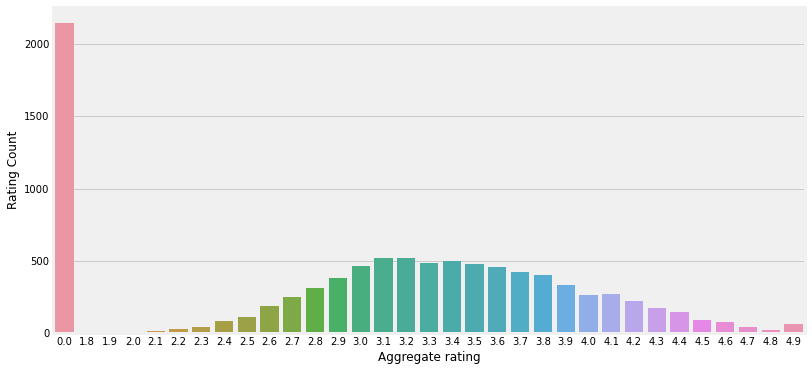

In [26]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x="Aggregate rating", y= "Rating Count",data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

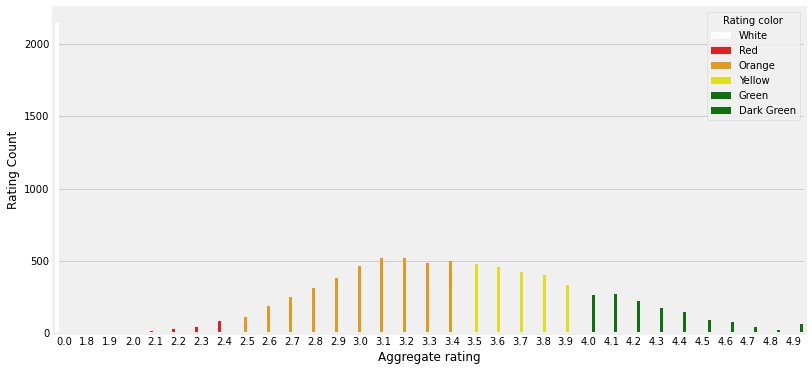

In [27]:
sns.barplot(x="Aggregate rating", y= "Rating Count",hue='Rating color',data=ratings,palette=['white','red','orange','yellow','green','green'])

## Observation
1. Not rated count is very high
2. Maximum number of ratings are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

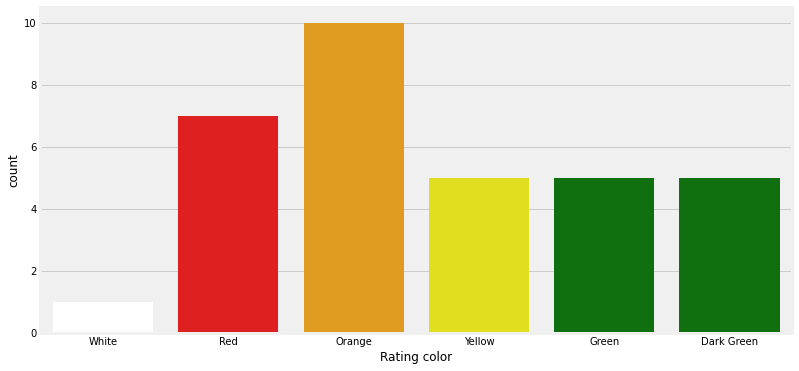

In [28]:
## Count Plot

sns.countplot(x='Rating color', data=ratings,palette=['white','red','orange','yellow','green','green'])

In [29]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


## Observation
Maximum number of 0 ratings are from indian customers.

# which countries use which currency.

In [30]:
final_df.groupby(['Currency','Country']).size().reset_index().head(10)

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


## lets check which countries do online food delivery.

In [31]:
final_df.groupby(["Country","Has Online delivery"]).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


## Observation
1. Online deliveries are available in india and UAE

<AxesSubplot:>

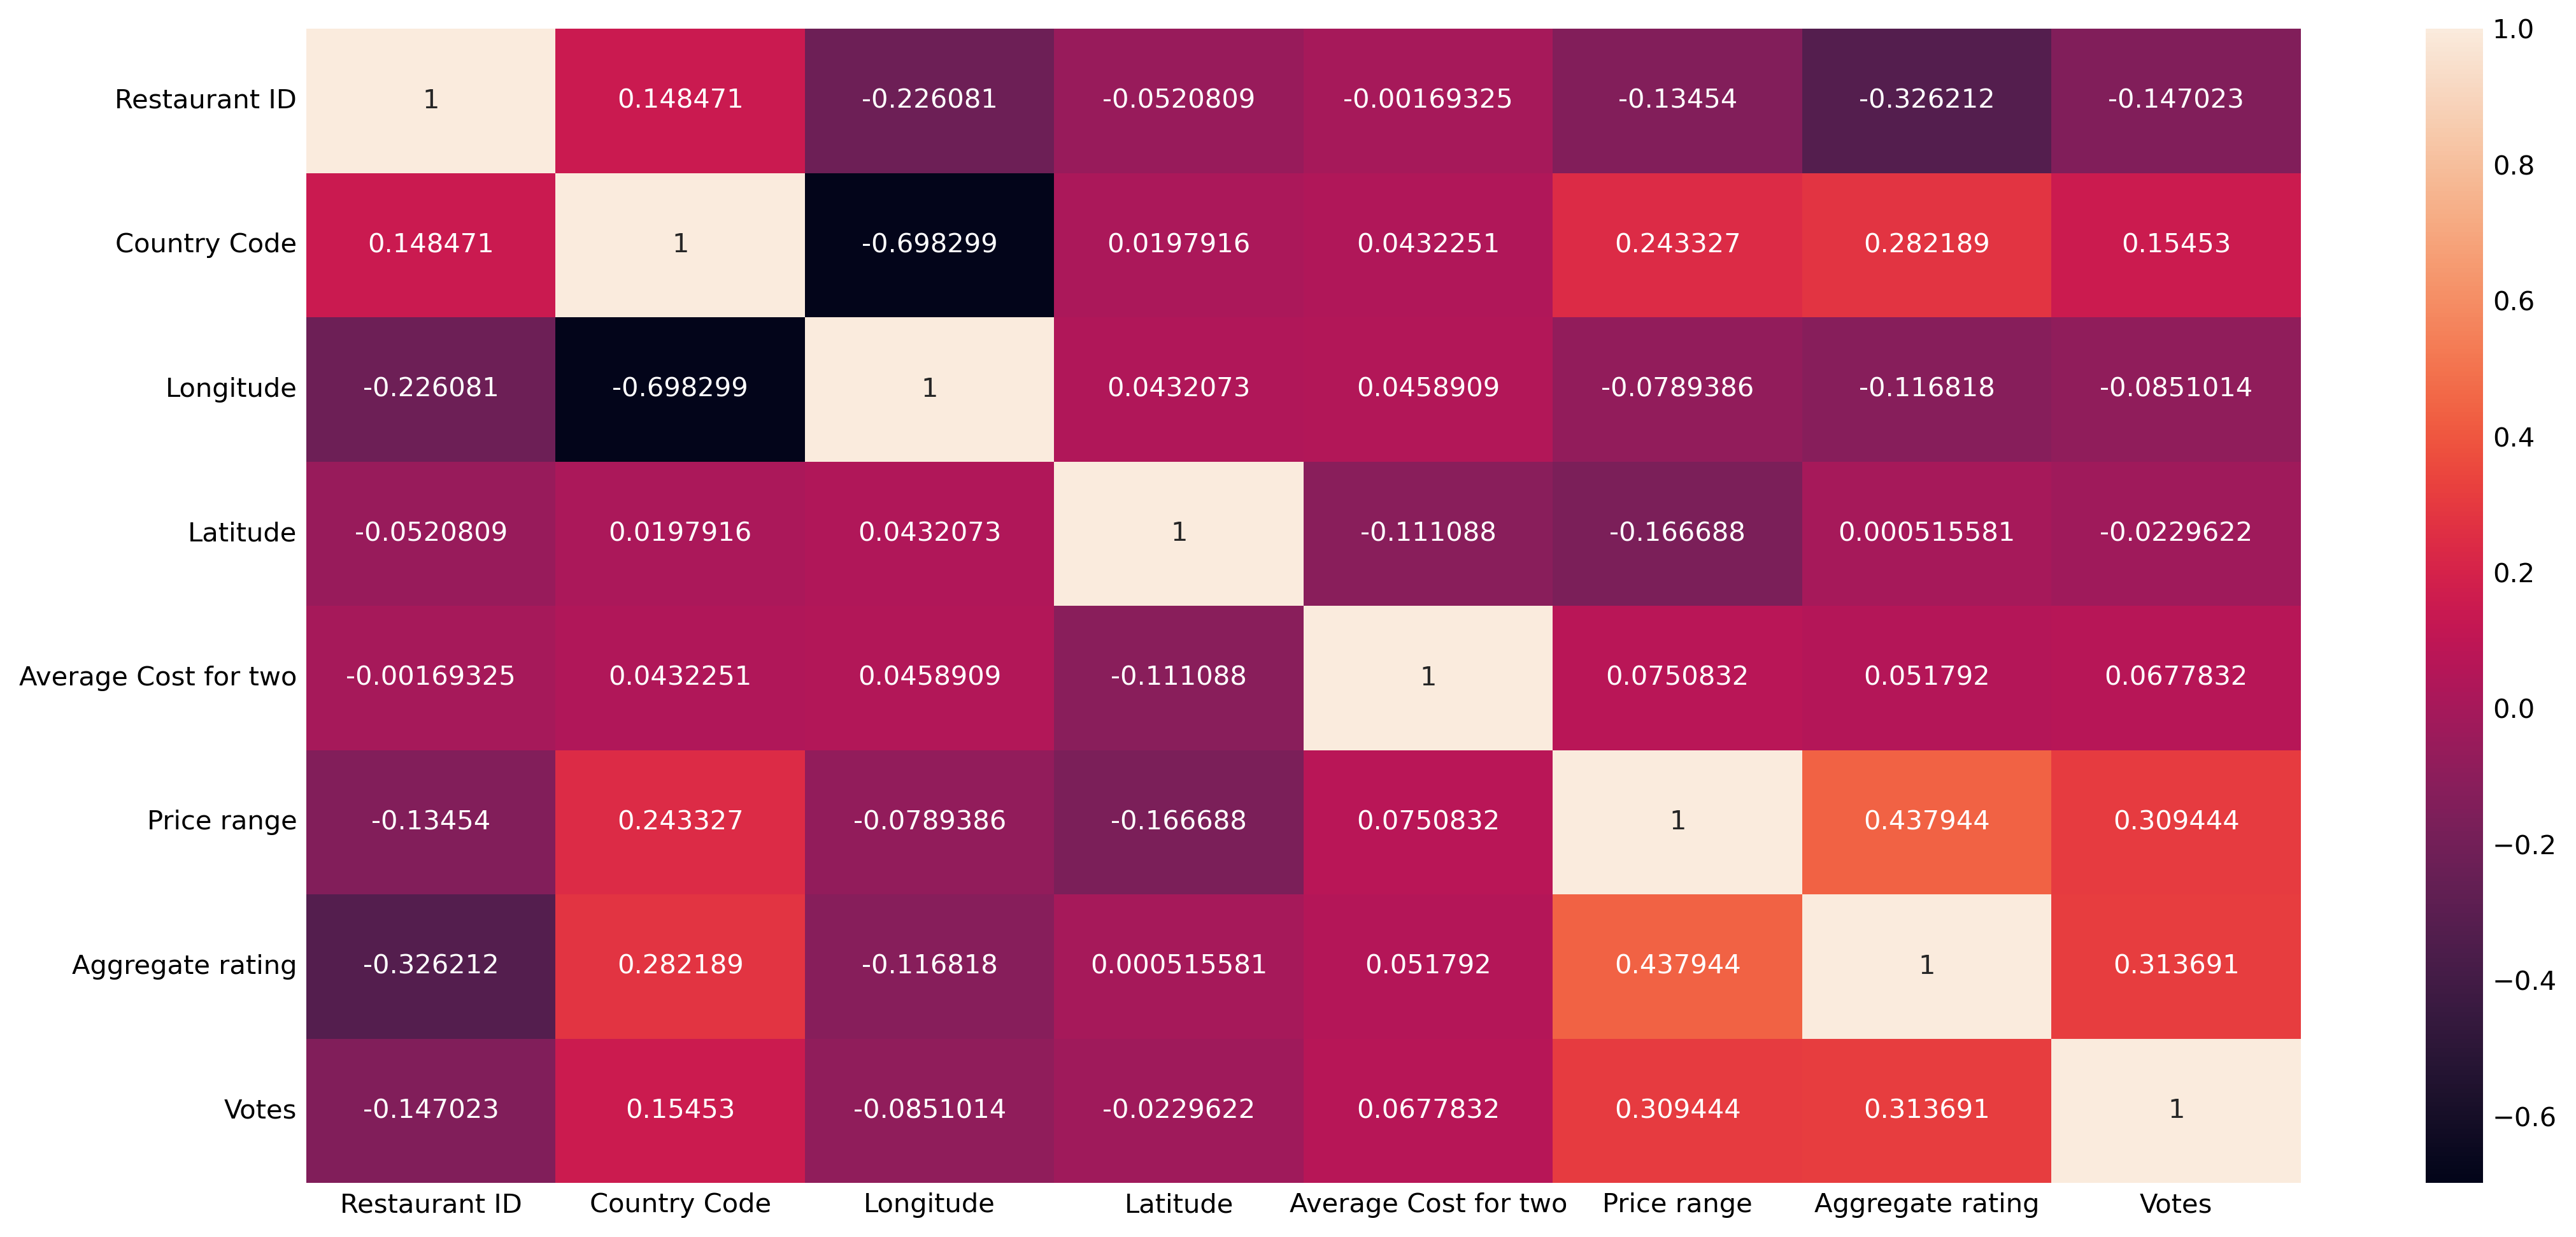

In [32]:
## Correlation heatmap

plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(df.corr(),fmt='g',annot=True)

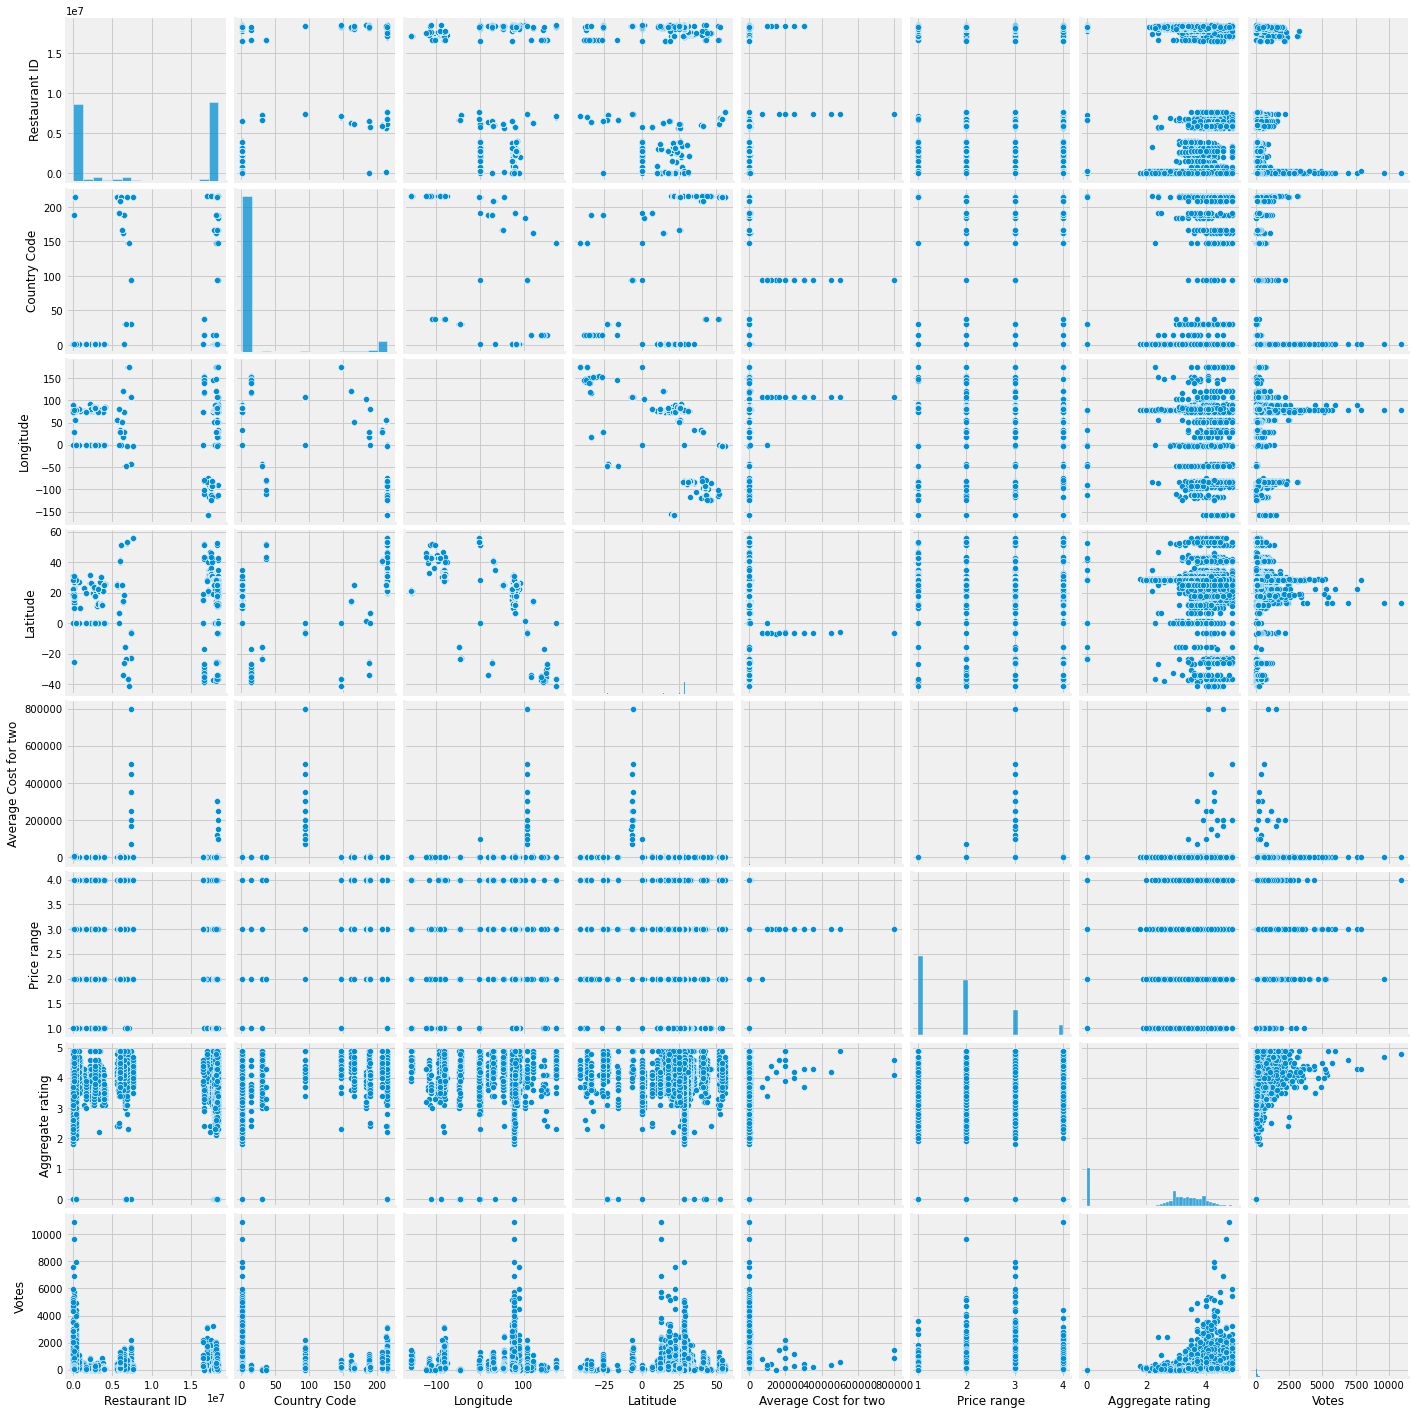

In [33]:
sns.pairplot(df)

In [34]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


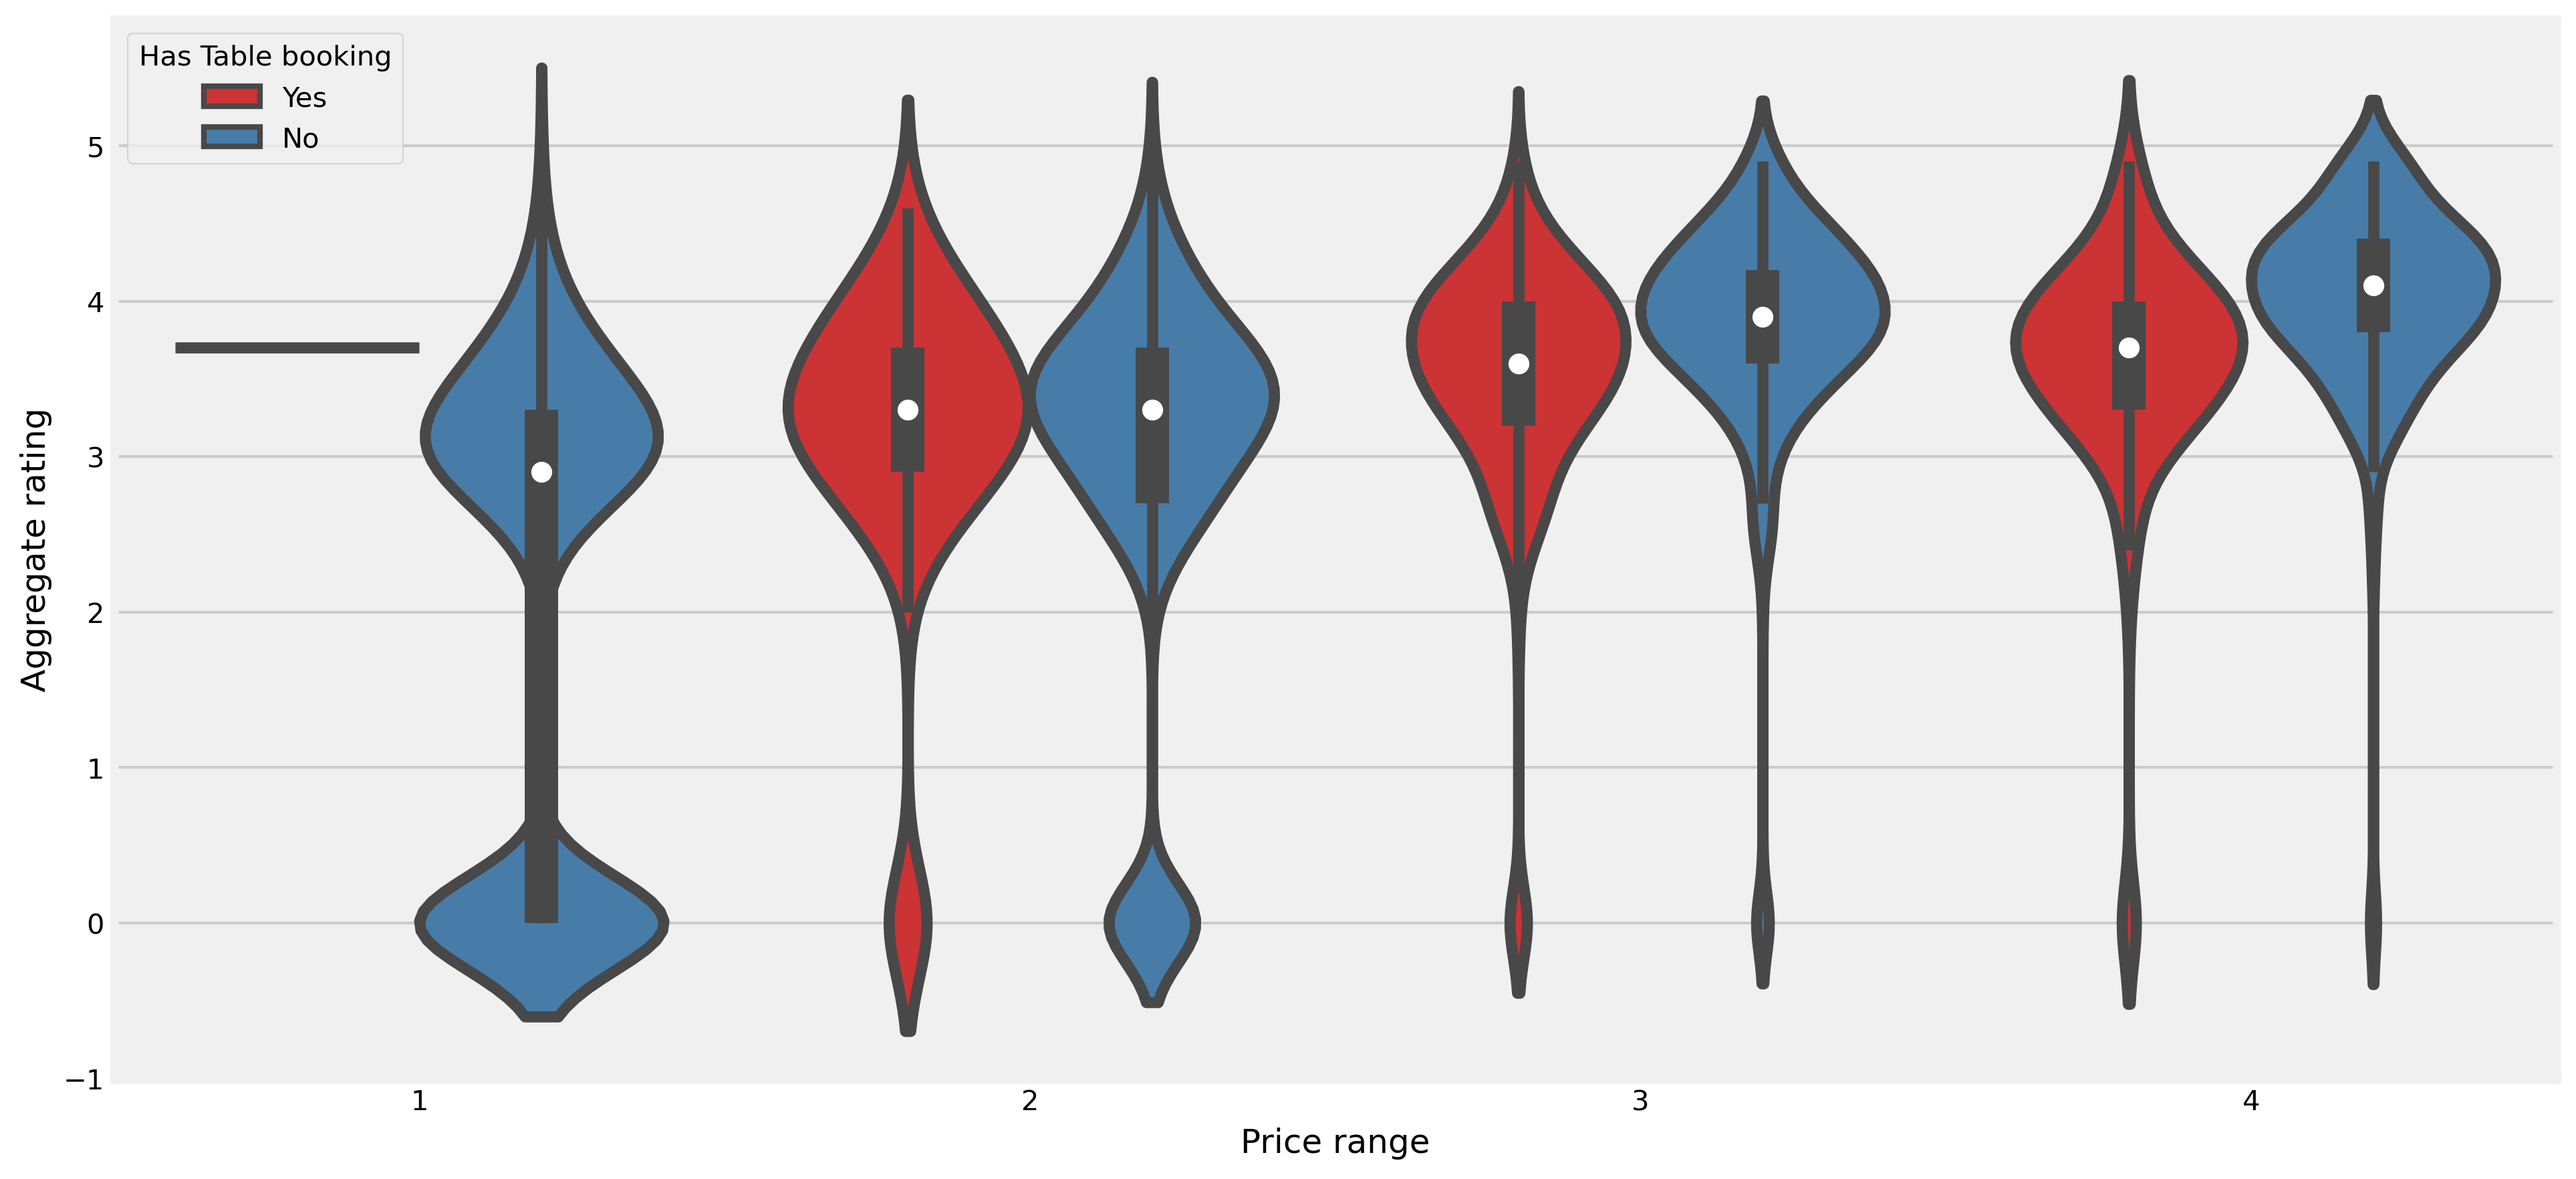

In [35]:
plt.figure(figsize=(14,7),dpi=300)
sns.violinplot(x=df['Price range'], y=df['Aggregate rating'],hue=df['Has Table booking'],palette='Set1',dodge=True);

## The countries that has given zero ratings.

In [36]:
final_df.groupby(["Aggregate rating", "Country"]).size().reset_index().head(4)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


In [37]:
final_df[final_df["Aggregate rating"]==0].Country.value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

## Observation

Maximum number of zero ratings are from india.

## pie chart for top 5 cities distribution.


In [38]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7f8f35bdbca0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029922, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289048, '0.31%')])

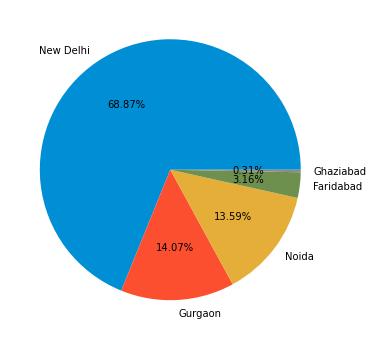

In [39]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

## Distribution of Cost of Food for two People

In [40]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [87]:
trace0=go.Box(y=df['Price range'],name="accepting online delivery",
              marker = dict(
        color = 'rgb(113, 10, 100)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=800,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

### Distribution of charges

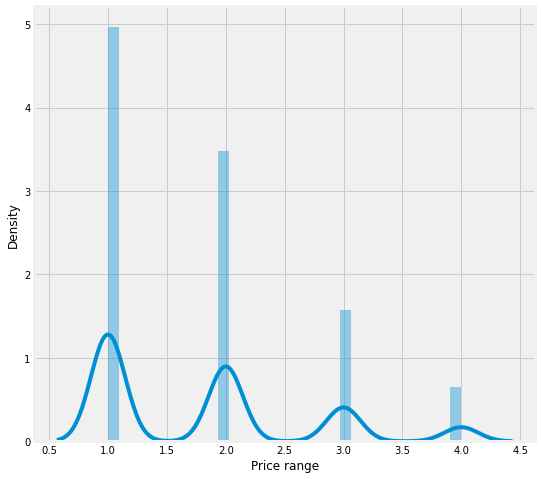

In [42]:
plt.figure(figsize=(8,8))
sns.distplot(df['Price range'])
plt.show()

## Creating a new dataframe in which we have votes, cost and rating of the restaurant

In [43]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [45]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [52]:
rest=df.groupby('Restaurant Name').agg({'Votes':'sum','Restaurant ID':'count','Average Cost for two':'mean','Aggregate rating':'mean'}).reset_index()
rest

,Restaurant Name,Votes,Restaurant ID,Average Cost for two,Aggregate rating
0,Let's Burrrp,0,1,400.0,0.0
1,#45,209,1,600.0,3.6
2,#Dilliwaala6,124,1,800.0,3.7
3,#InstaFreeze,2,1,300.0,0.0
4,#OFF Campus,216,1,800.0,3.7
...,...,...,...,...,...
7441,t Lounge by Dilmah,34,1,800.0,3.6
7442,tashas,374,1,320.0,4.1
7443,wagamama,131,1,70.0,3.7
7444,{Niche} - Cafe & Bar,492,1,1500.0,4.1


In [53]:
rest.columns=['name','total_Votes','total_unities','Average Cost for two','mean_rating']
rest.head()

,name,total_Votes,total_unities,Average Cost for two,mean_rating
0,Let's Burrrp,0,1,400.0,0.0
1,#45,209,1,600.0,3.6
2,#Dilliwaala6,124,1,800.0,3.7
3,#InstaFreeze,2,1,300.0,0.0
4,#OFF Campus,216,1,800.0,3.7


In [54]:
rest['Votes_per_unity']=rest['total_Votes']/rest['total_unities']
rest

,name,total_Votes,total_unities,Average Cost for two,mean_rating,Votes_per_unity
0,Let's Burrrp,0,1,400.0,0.0,0.0
1,#45,209,1,600.0,3.6,209.0
2,#Dilliwaala6,124,1,800.0,3.7,124.0
3,#InstaFreeze,2,1,300.0,0.0,2.0
4,#OFF Campus,216,1,800.0,3.7,216.0
...,...,...,...,...,...,...
7441,t Lounge by Dilmah,34,1,800.0,3.6,34.0
7442,tashas,374,1,320.0,4.1,374.0
7443,wagamama,131,1,70.0,3.7,131.0
7444,{Niche} - Cafe & Bar,492,1,1500.0,4.1,492.0


In [55]:
popular=rest.sort_values(by='total_unities',ascending=False)
popular 

,name,total_Votes,total_unities,Average Cost for two,mean_rating,Votes_per_unity
1099,Cafe Coffee Day,2428,83,450.000000,2.419277,29.253012
2099,Domino's Pizza,6643,79,700.000000,2.740506,84.088608
6106,Subway,6124,63,498.412698,2.907937,97.206349
2717,Green Chick Chop,964,51,350.000000,2.672549,18.901961
4077,McDonald's,5291,48,490.625000,3.339583,110.229167
...,...,...,...,...,...,...
2618,Ghungroo Club & Bar - By Gautam Gambhir,140,1,1500.000000,3.800000,140.000000
2617,Ghar Ki Handi,6,1,300.000000,3.000000,6.000000
2616,Ghar Ka Swad,2,1,400.000000,0.000000,2.000000
2614,Ghar Bistro Cafe,153,1,800.000000,4.400000,153.000000


In [56]:
popular.shape

(7446, 6)

In [57]:
popular['name'].nunique()

7446

Text(0.5, 1.0, 'Top 5 less voted restaurants')

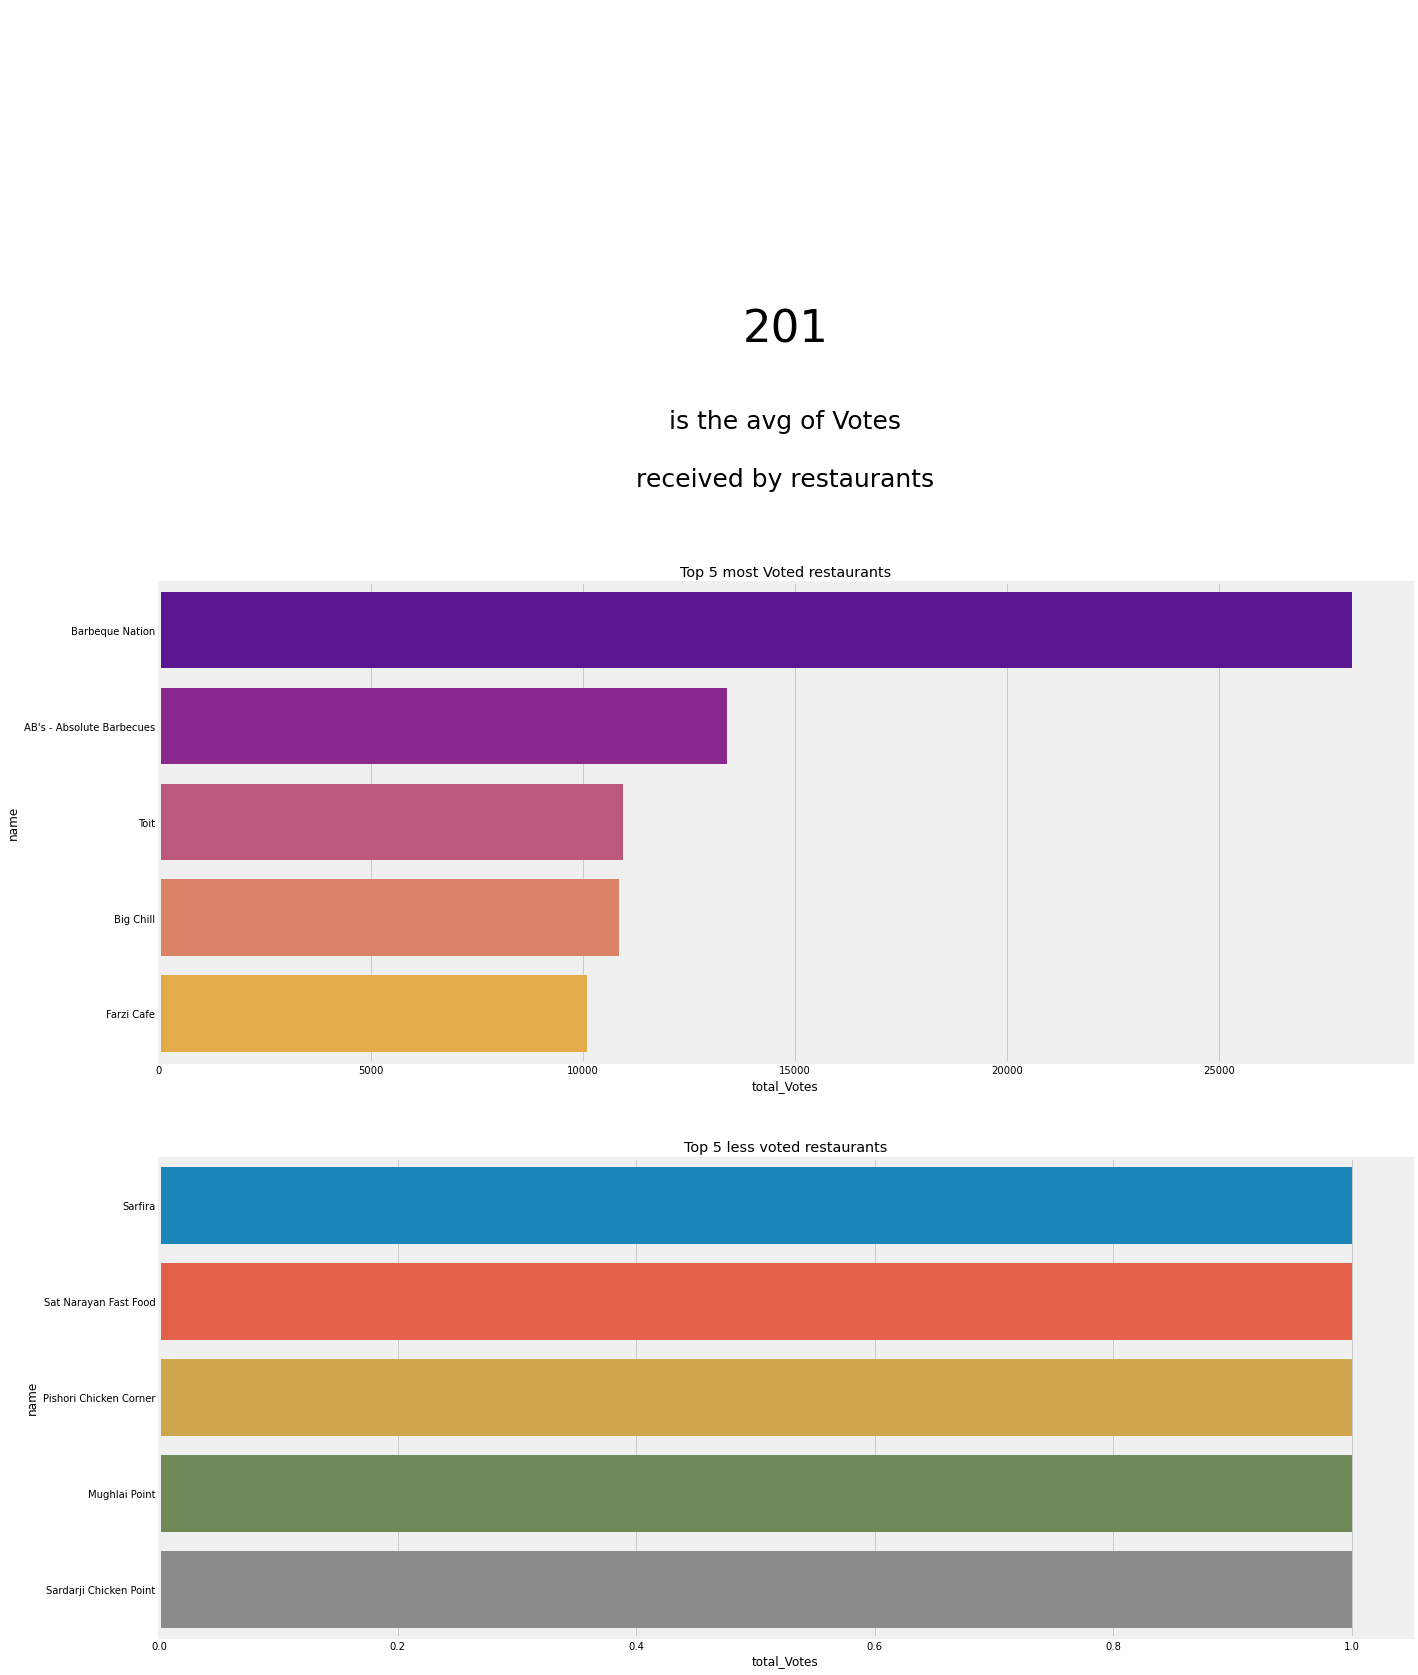

In [58]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.50,0.30,int(popular['total_Votes'].mean()),fontsize=45,ha='center')
ax1.text(0.50,0.12,'is the avg of Votes',fontsize=25,ha='center')
ax1.text(0.50,0.00,'received by restaurants',fontsize=25,ha='center')
ax1.axis('off')

sns.barplot(x='total_Votes',y='name',data=popular.sort_values(by='total_Votes',ascending=False).query('total_Votes>0').head(5),ax=ax2,palette='plasma')
ax2.set_title('Top 5 most Voted restaurants')
sns.barplot(x='total_Votes',y='name',data=popular.sort_values(by='total_Votes',ascending=False).query('total_Votes>0').tail(5),ax=ax3)
ax3.set_title('Top 5 less voted restaurants')

## Restautrants offering table booking or not

In [62]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [63]:
x=df['Has Table booking'].value_counts()
labels=['no booking','booking']

In [65]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [66]:
trace=go.Pie(labels=labels,values=x,hoverinfo='label+percent',textinfo='percent')
iplot([trace])

### As per above pie chart we can see more than 87% of the resturants are not offering table booking.

<AxesSubplot:xlabel='Has Table booking', ylabel='count'>

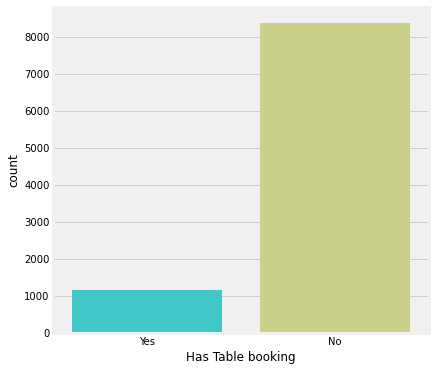

In [79]:
plt.figure(figsize = (6,6))
sns.countplot(df['Has Table booking'], palette = 'rainbow')

### Visualization of Book Table vs Rate

<AxesSubplot:xlabel='Has Table booking', ylabel='Aggregate rating'>

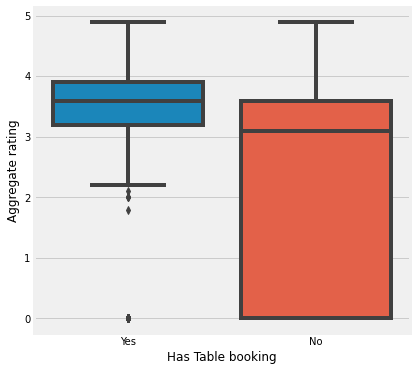

In [80]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'Has Table booking', y = 'Aggregate rating', data = df)

### Visualisation of table booking and Location Wise

In [82]:
df2 = df.groupby(['Locality','Has Table booking'])['Restaurant Name'].count()
df2.to_csv('Locality_booktable.csv')
df2 = pd.read_csv('Locality_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['Locality'], columns=['Has Table booking'], fill_value=0, aggfunc=np.sum)
df2

Restaurant Name    
Has Table booking                                No Yes
Locality                                               
 ILD Trade Centre Mall, Sohna Road                1   1
12th Square Building, Banjara Hills               0   1
A Hotel, Gurdev Nagar                             1   0
ARSS Mall, Paschim Vihar                          1   0
Aaya Nagar                                        1   0
...                                             ...  ..
ibis New Delhi, Aerocity                          1   1
íguas Claras                                     3   0
íayyolu                                          1   0
íukurambar                                       1   0
íìmitkí_y                                         1   0

[1208 rows x 2 columns]

<AxesSubplot:xlabel='Locality'>

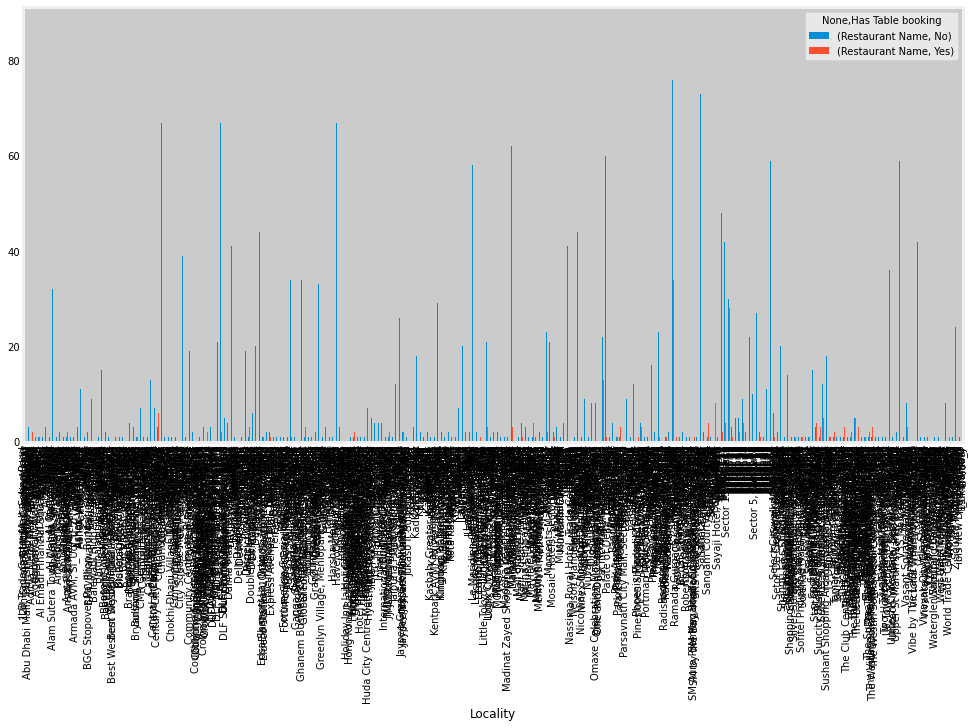

In [83]:
df2.plot(kind = 'bar', figsize = (15,8))

### Lets find out location wise number of votes.

In [84]:
df4 = df[['Locality', 'Votes']]
df4.drop_duplicates()
df5 = df4.groupby(['Locality'])['Votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('Votes', ascending=False)
df5.head()

,Votes
Locality,
Connaught Place,128109
"Cyber Hub, DLF Cyber City",36185
Hauz Khas Village,32573
Khan Market,28465
Rajouri Garden,25692


(array([   0,    1,    2, ..., 1205, 1206, 1207]),
 [Text(0, 0, 'Connaught Place'),
  Text(1, 0, 'Cyber Hub, DLF Cyber City'),
  Text(2, 0, 'Hauz Khas Village'),
  Text(3, 0, 'Khan Market'),
  Text(4, 0, 'Rajouri Garden'),
  Text(5, 0, 'Sector 18'),
  Text(6, 0, 'Sector 29'),
  Text(7, 0, 'Indiranagar'),
  Text(8, 0, 'Delhi University-GTB Nagar'),
  Text(9, 0, 'Park Street Area'),
  Text(10, 0, 'Satyaniketan'),
  Text(11, 0, 'Defence Colony'),
  Text(12, 0, 'Koramangala 5th Block'),
  Text(13, 0, 'Vijay Nagar'),
  Text(14, 0, 'Savannah'),
  Text(15, 0, 'Greater Kailash (GK) 2'),
  Text(16, 0, 'Malviya Nagar'),
  Text(17, 0, 'Athens'),
  Text(18, 0, 'Jubilee Hills'),
  Text(19, 0, 'Pensacola'),
  Text(20, 0, 'Greater Kailash (GK) 1'),
  Text(21, 0, 'Boise'),
  Text(22, 0, 'Janpath'),
  Text(23, 0, 'Select Citywalk Mall, Saket'),
  Text(24, 0, 'Safdarjung'),
  Text(25, 0, 'DLF Mall of India, Sector 18,  Noida'),
  Text(26, 0, 'Pandara Road Market'),
  Text(27, 0, 'Marathahalli'),
  Text(

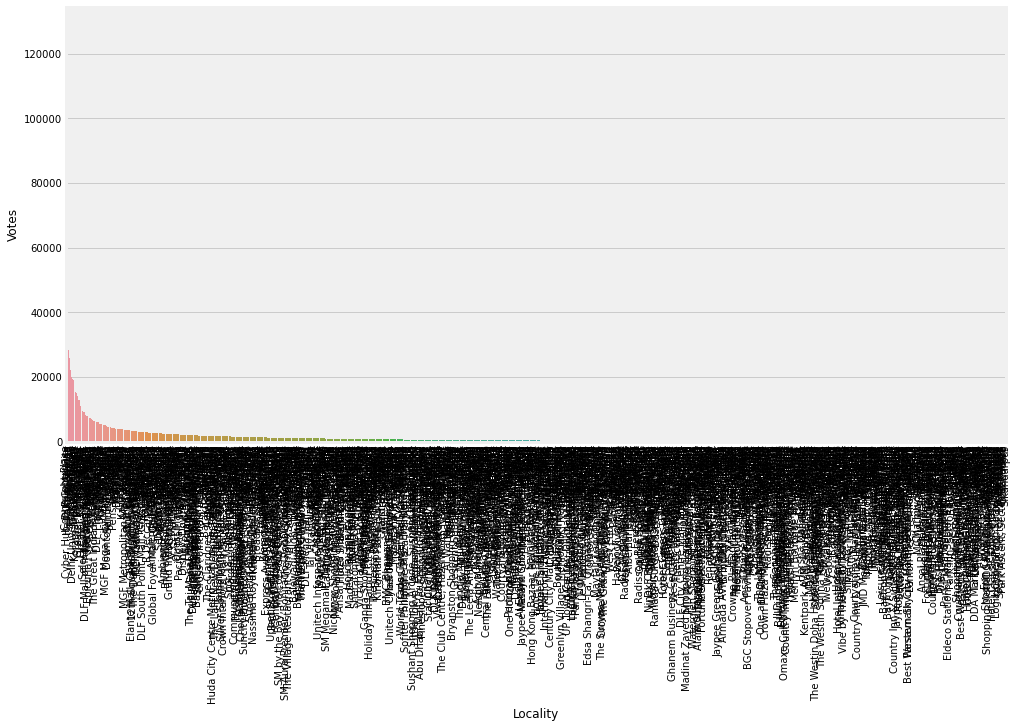

In [86]:
plt.figure(figsize = (15,8))
sns.barplot(df5.index , df5['Votes'])
plt.xticks(rotation = 90)